In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import time
from qiskit.providers.aer import QasmSimulator
import numpy as np
from qiskit_experiments.library import randomized_benchmarking as rb
#from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils
from qiskit_experiments.library import StandardRB, InterleavedRB
import qiskit.circuit.library as circuits
import qiskit.circuit.library
from qiskit.circuit import Delay, Instruction
from qiskit.circuit.library.standard_gates import XGate, SXGate, IGate, CCXGate, SGate
from datetime import datetime


# For simulation

In [6]:
from qiskit import IBMQ
#IBMQ.save_account('befca44219528a564b7f4d3f53707de8985c22fb7b8c969ef2728c830de7c612716e76f41fbc0a52d65f63e71a3a2437948befd3042b1ffab4ced07d573192f1')
IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-community', group='qamp', project='spring-22-17')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='internal', project='reservations')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='squirl')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>,
 <AccountProvider for IBMQ(hub='qc-spring-22-4', group='group-4', project='recdZ7NwFc2tUZtMH')>]

In [7]:
provider=IBMQ.providers()[2]
#provider = IBMQ.get_provider(hub='ibm-q-community', group='qamp', project='spring-22-17')
#backend=provider.backend.ibmq_lima
backend = provider.get_backend('ibmq_kolkata')

# get the basic feautures including qubit number of the backend.
config = backend.configuration()
backend_job_limit=backend.job_limit()

print("{0} is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}.{6} are the list of connected qubits."
      "{7} can handle maximum {8} circuits(experiments) per job."
      "Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is {9}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates,
                config.coupling_map,
               config.backend_name,
               config.max_experiments,
               backend_job_limit.maximum_jobs))

ibmq_kolkata is on version 1.11.2. It has 27 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].[[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]] are the list of connected qubits.ibmq_kolkata can handle maximum 300 circuits(experiments) per job.Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is None.


# kolkata_q23,24


ibmq_kolkata
kolkata_q23,24_2qDelay
reported CXerror at 2022-05-31 11:01:57.539462 is 0.0039567619823712985
2022-05-31 11:01:58.308860


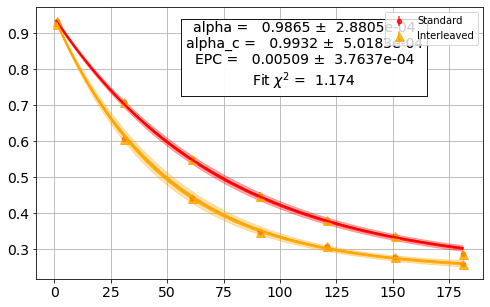

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.7003275418622054, 0.9865195378972217, 0.9932129193512818, 0.24230368829369026]
- χ²: 1.1735049997608402
- quality: good
- extra: <4 items>
- device_components: ['Q23', 'Q24']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.98652+/-0.00029
- χ²: 1.1735049997608402
- quality: good
- extra: <1 items>
- device_components: ['Q23', 'Q24']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.9932+/-0.0005
- χ²: 1.1735049997608402
- quality: good
- extra: <1 items>
- device_components: ['Q23', 'Q24']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0051+/-0.0004
- χ²: 1.1735049997608402
- quality: good
- extra: <3 items>
- device_components: ['Q23', 'Q24']
- verified: False
CXerror rate after experiment=
0.0039567619823712985


In [4]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = [23,24]
date= datetime.today()
CXerror=backend.properties().gate_error('cx',(23,24))
print(backend)
print('kolkata_q23,24_2qDelay')
print(f"reported CXerror at {date} is {CXerror}")
print(datetime.today())

duration=backend.properties().gate_length('cx',(23,24))/backend.configuration().dt
delay_qc = QuantumCircuit(2)
delay_qc.delay(round(duration), [0], unit="dt")
delay_qc.delay(round(duration), [1], unit="dt")
int_exp2 = InterleavedRB(
    interleaved_element=delay_qc, qubits=[23,24], lengths=lengths, num_samples=num_samples, seed=seed)
int_exp2.set_transpile_options(scheduling_method='asap')
# Run
int_expdata2 = int_exp2.run(backend, shots=1000).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

print('CXerror rate after experiment=')
print(backend.properties().gate_error('cx',(23,24)))

In [7]:
date=datetime.today()
CLE=RBUtils.coherence_limit(nQ=2, 
T1_list=[backend.properties().t1(23),backend.properties().t1(24)],
T2_list=[backend.properties().t2(23),backend.properties().t2(24)], 
gatelen=backend.properties().gate_length('cx',(23,24)))
print(f"CLE is {CLE} at {date}")

CLE is 0.0055307994179208675 at 2022-05-31 10:44:55.655921


<ipython-input-7-e7b2f64d8be7>:2: DeprecationWarning: The method 'coherence_limit' of 'RBUtils' class has been deprecated and will be removed after Qiskit Experiments 0.4. Please use coherence_limit_error function that can handle three or more qubits instead.
  CLE=RBUtils.coherence_limit(nQ=2,


In [12]:

CLE=RBUtils.coherence_limit(nQ=2,
T1_list=[backend.properties(datetime=date).t1(23),backend.properties().t1(24)],
T2_list=[backend.properties(datetime=date).t2(23),backend.properties().t2(24)], 
gatelen=backend.properties(datetime=date).gate_length('cx',(23,24)))
print(f"CLE is {CLE} at {date}")

CLE is 0.006882172881740062 at 2021-05-31 11:20:00


In [11]:
date = datetime(2021, 5, 31, 11, 20)